In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import torch
from matplotlib import pyplot as plt
from tqdm import tqdm

from mutual_information import mutual_information_T_Y, mutual_information_X_T, mutual_information_T_C
from utils import light_blue, blue, orange, light_orange, green, light_green, \
    red, NO_CBM, NO_CBM_plus, CBM_bool, CBM_fuzzy, CBM_fuzzy_plus, \
    MaskedBoundedEmbedding, SplitEmbedding, name_mappings

In [2]:
dataset = "cub"

result_folder = "results"
image_folder = "images"
trig_folder = "cub_activations_expr"
orig_dir = os.path.abspath(os.path.curdir)

output_file = "test_embedding_vectors_on_epoch"

# methods = [NO_CBM, NO_CBM_plus, CBM_bool, CBM_fuzzy, CBM_fuzzy_plus,
#            MaskedBoundedEmbedding, SplitEmbedding]
methods = [CBM_bool, CBM_fuzzy, CBM_fuzzy_plus,
           MaskedBoundedEmbedding, SplitEmbedding]

seeds = [*range(1, 3)]
epochs = [*range(20), *range(40, 260, 20), 250]

ConceptBottleneckModelBool_resnet34_fold_1: 100%|██████████| 32/32 [04:07<00:00,  7.74s/it]


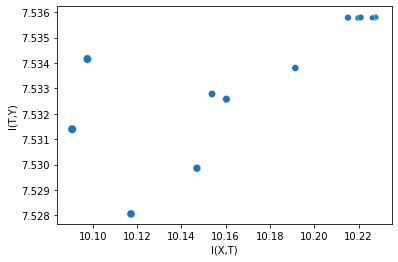

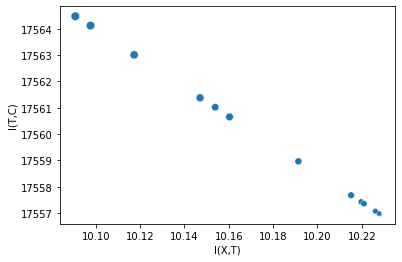

ConceptBottleneckModelFuzzy_resnet34_fold_1: 100%|██████████| 32/32 [03:56<00:00,  7.38s/it]


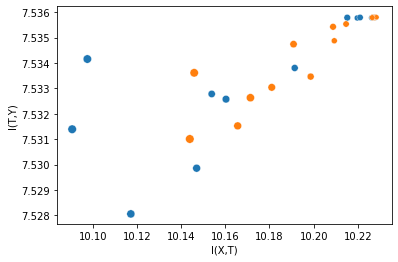

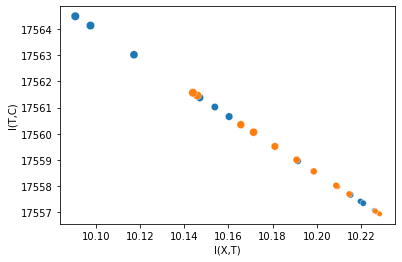

ConceptBottleneckModelFuzzyExtraCapacity_resnet34_fold_1: 100%|██████████| 32/32 [05:12<00:00,  9.77s/it]


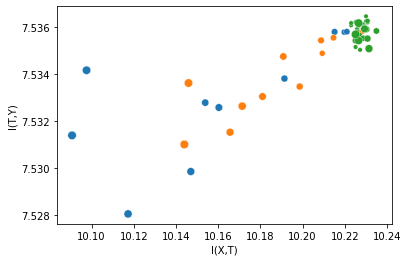

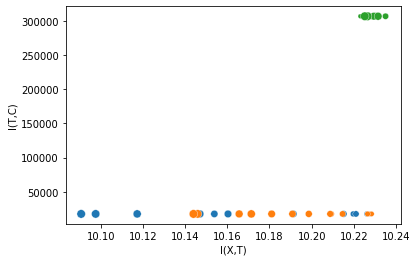

MaskedSplitEmbModelBounded_resnet34_fold_1: 100%|██████████| 32/32 [05:07<00:00,  9.60s/it]


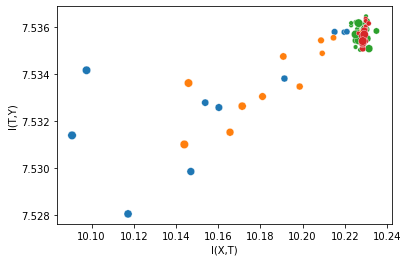

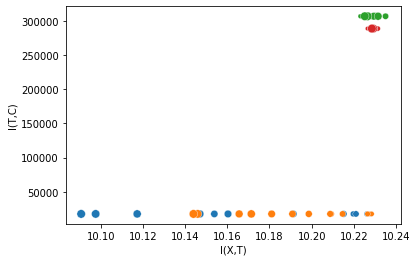

SplitEmbModel_resnet34_fold_1:   0%|          | 0/32 [00:00<?, ?it/s]

SplitEmbModel_resnet34_fold_1:   3%|▎         | 1/32 [00:10<05:18, 10.28s/it]

SplitEmbModel_resnet34_fold_1:   6%|▋         | 2/32 [00:19<05:03, 10.10s/it]

SplitEmbModel_resnet34_fold_1:   9%|▉         | 3/32 [00:29<04:51, 10.04s/it]

SplitEmbModel_resnet34_fold_1:  12%|█▎        | 4/32 [00:39<04:38,  9.93s/it]

SplitEmbModel_resnet34_fold_1:  16%|█▌        | 5/32 [00:49<04:27,  9.91s/it]

SplitEmbModel_resnet34_fold_1:  19%|█▉        | 6/32 [00:59<04:19, 10.00s/it]

SplitEmbModel_resnet34_fold_1:  22%|██▏       | 7/32 [01:09<04:09,  9.98s/it]

SplitEmbModel_resnet34_fold_1:  25%|██▌       | 8/32 [01:19<03:58,  9.94s/it]

SplitEmbModel_resnet34_fold_1:  28%|██▊       | 9/32 [01:29<03:47,  9.90s/it]

SplitEmbModel_resnet34_fold_1:  31%|███▏      | 10/32 [01:39<03:38,  9.93s/it]

SplitEmbModel_resnet34_fold_1:  34%|███▍      | 11/32 [01:48<03:27,  9.89s/it]

SplitEmbModel_resnet34_fold_1:  38%|███▊      | 12/32 [01:58<03:18,  9.91s/it]

SplitEmbModel_resnet34_fold_1:  41%|████      | 13/32 [02:08<03:07,  9.89s/it]

SplitEmbModel_resnet34_fold_1:  44%|████▍     | 14/32 [02:18<02:57,  9.84s/it]

SplitEmbModel_resnet34_fold_1:  47%|████▋     | 15/32 [02:28<02:46,  9.82s/it]

SplitEmbModel_resnet34_fold_1:  50%|█████     | 16/32 [02:38<02:37,  9.82s/it]

SplitEmbModel_resnet34_fold_1:  53%|█████▎    | 17/32 [02:47<02:26,  9.76s/it]

SplitEmbModel_resnet34_fold_1:  56%|█████▋    | 18/32 [02:57<02:16,  9.78s/it]

SplitEmbModel_resnet34_fold_1:  59%|█████▉    | 19/32 [03:07<02:07,  9.82s/it]

SplitEmbModel_resnet34_fold_1:  62%|██████▎   | 20/32 [03:17<01:58,  9.84s/it]

SplitEmbModel_resnet34_fold_1:  66%|██████▌   | 21/32 [03:27<01:47,  9.80s/it]

SplitEmbModel_resnet34_fold_1:  69%|██████▉   | 22/32 [03:36<01:38,  9.81s/it]

SplitEmbModel_resnet34_fold_1:  72%|███████▏  | 23/32 [03:46<01:28,  9.82s/it]

SplitEmbModel_resnet34_fold_1:  75%|███████▌  | 24/32 [03:56<01:17,  9.72s/it]

SplitEmbModel_resnet34_fold_1:  78%|███████▊  | 25/32 [04:06<01:08,  9.77s/it]

SplitEmbModel_resnet34_fold_1:  81%|████████▏ | 26/32 [04:15<00:58,  9.75s/it]

SplitEmbModel_resnet34_fold_1:  84%|████████▍ | 27/32 [04:25<00:48,  9.74s/it]

SplitEmbModel_resnet34_fold_1:  88%|████████▊ | 28/32 [04:35<00:38,  9.75s/it]

SplitEmbModel_resnet34_fold_1:  91%|█████████ | 29/32 [04:44<00:29,  9.73s/it]

SplitEmbModel_resnet34_fold_1:  94%|█████████▍| 30/32 [04:55<00:19,  9.82s/it]

SplitEmbModel_resnet34_fold_1:  97%|█████████▋| 31/32 [05:04<00:09,  9.80s/it]

SplitEmbModel_resnet34_fold_1: 100%|██████████| 32/32 [05:14<00:00,  9.83s/it]


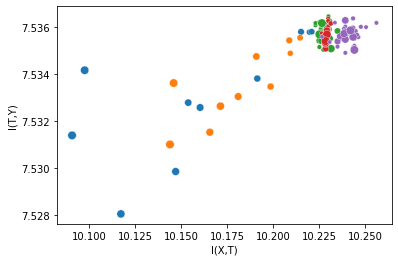

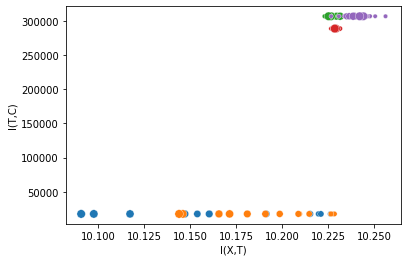

ConceptBottleneckModelBool_resnet34_fold_2: 100%|██████████| 32/32 [04:02<00:00,  7.58s/it]


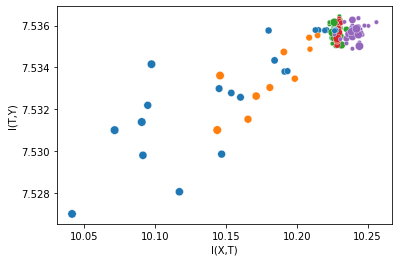

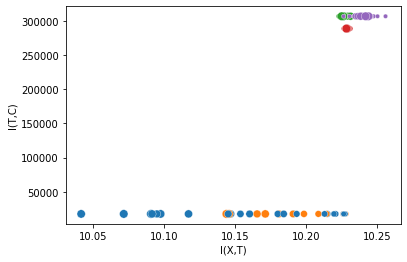

ConceptBottleneckModelFuzzy_resnet34_fold_2: 100%|██████████| 32/32 [03:54<00:00,  7.34s/it]


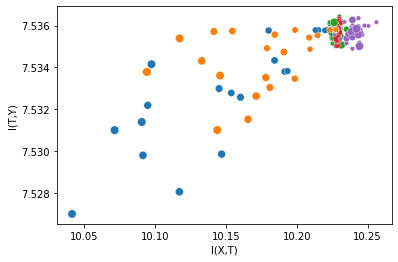

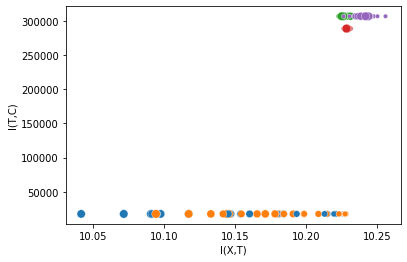

ConceptBottleneckModelFuzzyExtraCapacity_resnet34_fold_2: 100%|██████████| 32/32 [05:10<00:00,  9.71s/it]


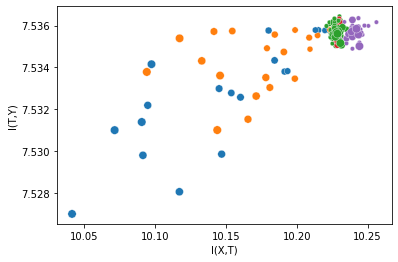

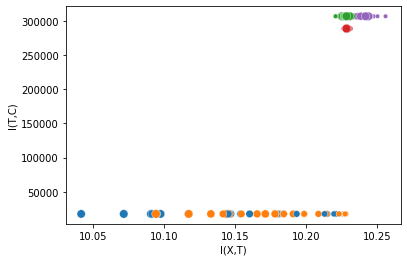

MaskedSplitEmbModelBounded_resnet34_fold_2: 100%|██████████| 32/32 [05:08<00:00,  9.66s/it]


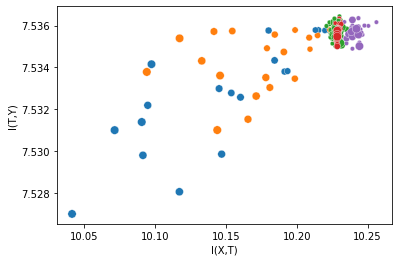

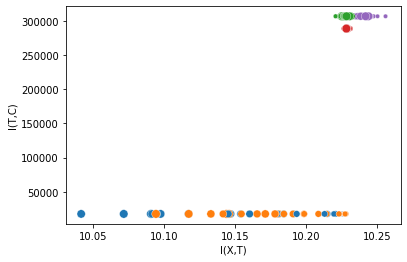

SplitEmbModel_resnet34_fold_2:   0%|          | 0/32 [00:00<?, ?it/s]

SplitEmbModel_resnet34_fold_2:   3%|▎         | 1/32 [00:09<05:05,  9.85s/it]

SplitEmbModel_resnet34_fold_2:   6%|▋         | 2/32 [00:19<04:54,  9.80s/it]

SplitEmbModel_resnet34_fold_2:   9%|▉         | 3/32 [00:29<04:44,  9.81s/it]

SplitEmbModel_resnet34_fold_2:  12%|█▎        | 4/32 [00:39<04:34,  9.81s/it]

SplitEmbModel_resnet34_fold_2:  16%|█▌        | 5/32 [00:48<04:23,  9.77s/it]

SplitEmbModel_resnet34_fold_2:  19%|█▉        | 6/32 [00:58<04:14,  9.78s/it]

SplitEmbModel_resnet34_fold_2:  22%|██▏       | 7/32 [01:08<04:03,  9.76s/it]

SplitEmbModel_resnet34_fold_2:  25%|██▌       | 8/32 [01:18<03:53,  9.75s/it]

SplitEmbModel_resnet34_fold_2:  28%|██▊       | 9/32 [01:27<03:44,  9.77s/it]

SplitEmbModel_resnet34_fold_2:  31%|███▏      | 10/32 [01:37<03:35,  9.81s/it]

SplitEmbModel_resnet34_fold_2:  34%|███▍      | 11/32 [01:47<03:25,  9.79s/it]

SplitEmbModel_resnet34_fold_2:  38%|███▊      | 12/32 [01:57<03:15,  9.78s/it]

SplitEmbModel_resnet34_fold_2:  41%|████      | 13/32 [02:07<03:05,  9.78s/it]

SplitEmbModel_resnet34_fold_2:  44%|████▍     | 14/32 [02:16<02:55,  9.74s/it]

SplitEmbModel_resnet34_fold_2:  47%|████▋     | 15/32 [02:26<02:45,  9.76s/it]

SplitEmbModel_resnet34_fold_2:  50%|█████     | 16/32 [02:36<02:36,  9.77s/it]

SplitEmbModel_resnet34_fold_2:  53%|█████▎    | 17/32 [02:46<02:26,  9.74s/it]

SplitEmbModel_resnet34_fold_2:  56%|█████▋    | 18/32 [02:55<02:16,  9.72s/it]

SplitEmbModel_resnet34_fold_2:  59%|█████▉    | 19/32 [03:05<02:06,  9.71s/it]

SplitEmbModel_resnet34_fold_2:  62%|██████▎   | 20/32 [03:15<01:56,  9.71s/it]

SplitEmbModel_resnet34_fold_2:  66%|██████▌   | 21/32 [03:24<01:47,  9.75s/it]

SplitEmbModel_resnet34_fold_2:  69%|██████▉   | 22/32 [03:34<01:37,  9.76s/it]

SplitEmbModel_resnet34_fold_2:  72%|███████▏  | 23/32 [03:44<01:27,  9.75s/it]

SplitEmbModel_resnet34_fold_2:  75%|███████▌  | 24/32 [03:54<01:17,  9.73s/it]

SplitEmbModel_resnet34_fold_2:  78%|███████▊  | 25/32 [04:03<01:08,  9.75s/it]

SplitEmbModel_resnet34_fold_2:  81%|████████▏ | 26/32 [04:13<00:58,  9.76s/it]

SplitEmbModel_resnet34_fold_2:  84%|████████▍ | 27/32 [04:23<00:48,  9.79s/it]

SplitEmbModel_resnet34_fold_2:  88%|████████▊ | 28/32 [04:33<00:38,  9.72s/it]

SplitEmbModel_resnet34_fold_2:  91%|█████████ | 29/32 [04:42<00:29,  9.75s/it]

SplitEmbModel_resnet34_fold_2:  94%|█████████▍| 30/32 [04:52<00:19,  9.67s/it]

SplitEmbModel_resnet34_fold_2:  97%|█████████▋| 31/32 [05:02<00:09,  9.65s/it]

SplitEmbModel_resnet34_fold_2: 100%|██████████| 32/32 [05:11<00:00,  9.74s/it]


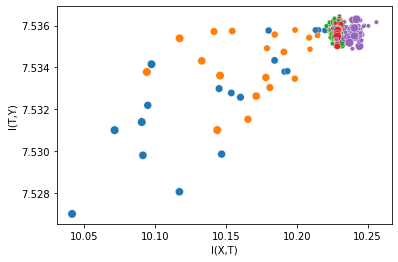

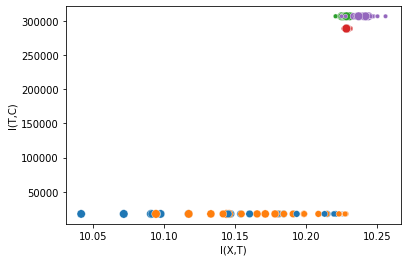

In [3]:
os.chdir(orig_dir)
os.chdir(os.path.join(result_folder, trig_folder))

labels_c = np.load("c_test.npy", allow_pickle=True)
labels_y = np.load("y_test.npy", allow_pickle=True)

debug = True
metrics = []
for seed in seeds:
    for method in methods:
        folder_name = f"{method}_resnet34_fold_{seed}"
        for epoch in tqdm(epochs, desc=folder_name):
            file = os.path.join(folder_name, f"{output_file}_{epoch}.npy")
            output = np.load(file, allow_pickle=True)

            if np.max(output) > 1:
                output = torch.sigmoid(torch.as_tensor(output)).numpy()
                print("Warning: output re-normalized")

            MI_X_T = mutual_information_X_T(output)
            MI_T_Y = mutual_information_T_Y(output, labels_y)
            MI_T_C = mutual_information_T_C(output, labels_c)

            epoch_metric = {
                "dataset": dataset,
                "method": method,
                "seed": seed,
                "epoch": epoch,
                "I(X,T)": MI_X_T,
                "I(T,C)": MI_T_C,
                "I(T,Y)": MI_T_Y,
            }
            metrics.append(epoch_metric)

        if debug:
            df = pd.DataFrame(metrics)
            ax = sns.scatterplot(data=df, x="I(X,T)", y="I(T,Y)",
                            hue="method", size="epoch")
            ax.legend().set_visible(False)
            plt.show()
            ax = sns.scatterplot(data=df, x="I(X,T)", y="I(T,C)",
                            hue="method", size="epoch")
            ax.legend().set_visible(False)
            plt.show()


os.chdir(orig_dir)
df = pd.DataFrame(metrics)
df.to_pickle(f"{dataset}_results.pkl")

In [3]:
df = pd.read_pickle(f"{dataset}_results.pkl")

if not os.path.isdir(image_folder):
    os.makedirs(image_folder)
os.chdir(image_folder)

In [4]:
df_mean = df.groupby(["dataset", "method", "epoch"]).mean().reset_index()
a = []
b = []
for i, row in df_mean.iterrows():
    a.append(row['I(X,T)'])
    if row['method']==CBM_fuzzy_plus:
        a[-1] += 0.1
    b.append(name_mappings[row['method']])
df_mean['I(X,T)'] = a
df_mean['method'] = b
print(df_mean['method'])

0                 Bool
1                 Bool
2                 Bool
3                 Bool
4                 Bool
            ...       
155    Split Embedding
156    Split Embedding
157    Split Embedding
158    Split Embedding
159    Split Embedding
Name: method, Length: 160, dtype: object


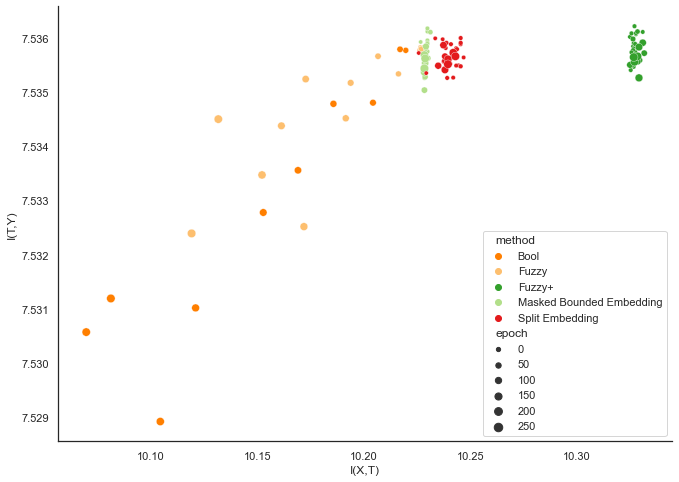

In [5]:
sns.set(style="white", rc={'figure.figsize':(11,8)})
palette = [orange, light_orange, green, light_green, red]

y_methods = methods
ax = sns.scatterplot(data=df_mean, x="I(X,T)", y="I(T,Y)",
                hue="method", palette=palette,size="epoch")
# ax.legend().set_visible(False)
sns.despine()
plt.savefig(f"{dataset}_plot_I(X,T)vsI(T,Y)")
plt.show()

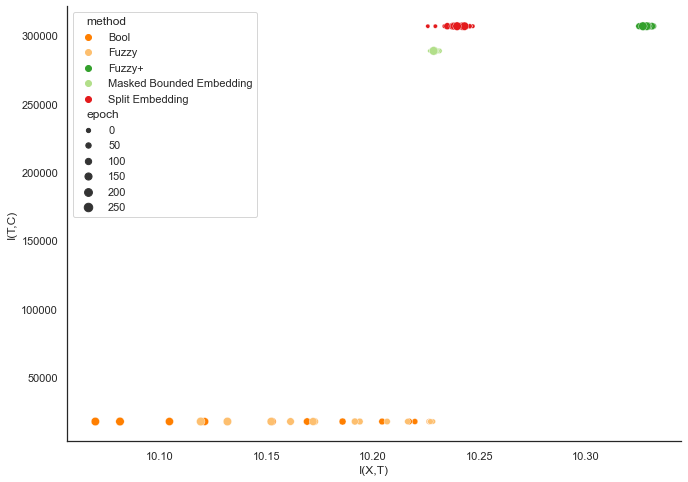

In [6]:
palette_c = [orange, light_orange, green, light_green, red]
df_c = df_mean.loc[[i for i, row in df_mean.iterrows() if row['method'] != name_mappings[NO_CBM]
                                                      and row['method'] != name_mappings[NO_CBM_plus]]]
ax = sns.scatterplot(data=df_c, x="I(X,T)", y="I(T,C)",
                hue="method", palette=palette_c,size="epoch")
# ax.legend().set_visible(False)
sns.despine()
plt.savefig(f"{dataset}_plot_I(X,T)vsI(T,C)")
plt.show()


In [ ]:
os.chdir(orig_dir)
os.listdir(".")